- Check the wind error and random retrieval error
- Calculate the shape error

In [1]:
import os
import numpy as np
from glob import glob
from itertools import chain
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
font_size = 17
rcParams['axes.titlesize'] = font_size
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelsize'] = font_size - 2
rcParams['xtick.labelsize'] = font_size - 2
rcParams['ytick.labelsize'] = font_size - 2
rcParams['legend.fontsize'] = font_size
rcParams['figure.titlesize'] = font_size
rcParams['figure.titleweight'] = 'bold'

In [3]:
data_dir = '../data/Hyper_TROPOMI_landfill/'

filelist = list(chain(*[glob(os.path.join(data_dir, '**', '*csv'), recursive=True)]))

df = pd.concat((pd.read_csv(f) for f in filelist), ignore_index=True)

## Wind error and random error

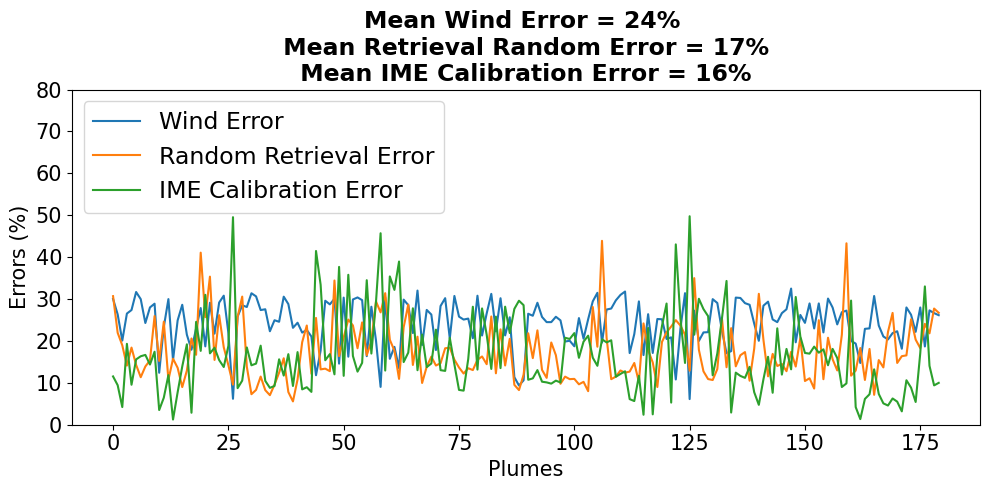

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['emission_uncertainty_wind']/df['emission']*1e2, label='Wind Error')
ax.plot(df['emission_uncertainty_random']/df['emission']*1e2, label='Random Retrieval Error')
ax.plot(df['emission_uncertainty_calibration']/df['emission']*1e2, label='IME Calibration Error')

ax.set_ylabel('Errors (%)')
ax.set_xlabel('Plumes')
ax.set_ylim(0, 80)

mean_err_wind = int(np.mean(df['emission_uncertainty_wind']/df['emission'])*100)
mean_err_random = int(np.mean(df['emission_uncertainty_random']/df['emission'])*100)
mean_err_clib = int(np.mean(df['emission_uncertainty_calibration']/df['emission'])*100)

plt.legend(loc='upper left')
plt.title(f'Mean Wind Error = {mean_err_wind}% \n Mean Retrieval Random Error = {mean_err_random}% \n Mean IME Calibration Error = {mean_err_clib}% ')

fig.tight_layout()
fig.savefig('../figures/errors.pdf')